In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
keras.__version__

'2.2.4'

In [5]:
from keras.datasets import cifar100

##Exploring the dataset

In [6]:
import matplotlib.pyplot as plt

In [7]:
from keras.utils import to_categorical

In [8]:
(train_X,train_Y_),(test_X,test_Y_) = cifar100.load_data()

In [9]:
train_Y = to_categorical(train_Y_)
test_Y = to_categorical(test_Y_)

In [10]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/ 255

In [11]:
train_X.shape

(50000, 32, 32, 3)

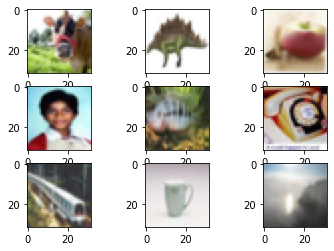

In [12]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(train_X[i])
plt.show()

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import  Conv2D, Dense, BatchNormalization, Flatten, MaxPool2D, Input

In [15]:
def create_VGG16_Network():
  model = Sequential()
  model.add(Input(shape = (32,32,3)))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 32, kernel_size=(3,3),activation='relu', padding= 'same', bias_regularizer='l2'))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 64, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same', bias_regularizer='l2'))
  model.add(Conv2D(filters = 128, kernel_size= (3,3),  activation = 'relu',padding = 'same', bias_regularizer='l2'))
  #model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(units = 256, activation = 'relu', bias_regularizer = 'l2'))
  model.add(Dense(units = 256,activation='relu', bias_regularizer='l2'))
  model.add(Dense(units = 100, activation = 'softmax'))
  return model


In [16]:
model  = create_VGG16_Network()

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_1:0", shape=(?, 32, 32, 3), dtype=float32)

In [17]:
from google.colab import drive

In [18]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
path = F'/content/gdrive/My Drive/Weights/VGG16_SGD_NoRegularization.h5'

In [20]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath = path, monitor = 'val_accuracy',save_best_only=True, save_weights_only=True)
#optimizer = keras.optimizers.SGD(momentum = 0.9, clipnorm = 1.0)
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          1

In [22]:
history = model.fit(x = train_X, y = train_Y, batch_size = 32, epochs = 200, validation_split=0.1, callbacks=[model_checkpoint, earlyStopping])

Epoch 1/200
1407/1407 [==============================] - 10s 7ms/step - loss: 4.6053 - accuracy: 0.0090 - val_loss: 4.6055 - val_accuracy: 0.0080
Epoch 2/200
1407/1407 [==============================] - 8s 6ms/step - loss: 4.6053 - accuracy: 0.0090 - val_loss: 4.6058 - val_accuracy: 0.0074
Epoch 3/200
1407/1407 [==============================] - 10s 7ms/step - loss: 4.6053 - accuracy: 0.0092 - val_loss: 4.6060 - val_accuracy: 0.0076
Epoch 4/200
1407/1407 [==============================] - 9s 6ms/step - loss: 4.6052 - accuracy: 0.0099 - val_loss: 4.6063 - val_accuracy: 0.0076
Epoch 5/200
1407/1407 [==============================] - 8s 6ms/step - loss: 4.6052 - accuracy: 0.0105 - val_loss: 4.6065 - val_accuracy: 0.0064
Epoch 6/200
1407/1407 [==============================] - 8s 6ms/step - loss: 4.6052 - accuracy: 0.0105 - val_loss: 4.6066 - val_accuracy: 0.0070
Epoch 7/200
1407/1407 [==============================] - 8s 6ms/step - loss: 4.6051 - accuracy: 0.0102 - val_loss: 4.6066 - val_

In [23]:
model.load_weights('/content/gdrive/My Drive/Weights/VGG16_SGD_NoRegularization.h5')

In [24]:
y_pred = model.predict(test_X)

In [25]:
y_pred = y_pred.argmax(-1)

In [26]:
y_pred

array([95, 66, 15, ..., 14, 79, 92])

In [27]:
y_true = test_Y.argmax(-1)

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [29]:
import pandas as pd

In [30]:
def get_all_metrics(y_pred, y_true):
  precision = precision_score(y_true,y_pred, average = 'weighted')
  recall = recall_score(y_true , y_pred, average= 'weighted')
  accuracy = accuracy_score(y_true, y_pred)
  return precision, recall, accuracy

In [31]:
prec, recall, accuracy = get_all_metrics(y_pred, y_true)

In [32]:
print('Precision:', prec)

Precision: 0.24222356331879205


In [36]:
print('Recall', recall)

Recall 0.2311


In [33]:
print('Accuracy', accuracy)

Accuracy 0.2311


In [34]:
import pandas as pd

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
pd.crosstab(y_pred, y_true, colnames = ['y_predicted'], rownames = ['y_true'])

y_predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
y_true,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49,0,0,0,0,0,0,2,0,1,5,0,0,0,0,1,2,0,0,0,0,0,2,0,1,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0
1,3,41,6,0,1,0,2,3,0,0,3,1,0,0,7,0,0,0,0,1,1,0,1,0,1,1,5,0,0,3,1,0,1,0,2,1,1,0,0,1,1,1,1,0,1,2,0,0,0,2,0,1,0,4,3,0,0,2,3,0,0,1,6,1,2,1,1,1,0,0,5,0,1,3,0,0,1,1,0,0,0,1,2,1,0,1,0,3,2,1,0,2,4,1,0,1,0,1,3,1
2,0,0,8,0,0,1,0,1,0,0,0,6,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,2,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,1,2,1,1,0,0,0,0,0,0,1,1,1,0
3,0,1,0,4,1,0,2,1,0,0,0,0,1,2,1,1,0,1,2,1,0,6,1,1,1,1,0,1,1,2,0,2,0,2,0,1,0,0,0,0,0,0,2,1,0,1,1,0,0,0,0,2,0,0,0,2,1,0,0,0,0,0,0,2,2,0,2,1,0,1,0,0,2,0,1,0,0,1,0,0,2,2,1,2,0,0,2,1,0,1,1,0,1,2,1,1,1,2,0,2
4,0,0,0,3,13,0,0,1,1,1,0,1,1,1,1,4,0,1,1,0,0,7,0,1,0,0,3,1,0,1,0,4,0,2,1,0,0,3,2,3,1,0,2,3,3,3,1,0,1,0,3,3,0,0,1,0,0,0,2,2,0,0,0,3,1,1,5,0,0,0,0,0,1,0,4,2,0,4,3,1,4,1,0,0,1,3,1,1,1,2,2,1,0,3,1,0,3,1,1,3
5,0,0,1,1,2,21,1,0,1,1,1,5,1,1,1,0,1,0,0,1,2,0,1,0,0,3,1,1,0,1,0,0,0,0,1,2,0,1,0,1,3,1,0,0,2,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,2,1,0,0,0,0,0,1,4,0,0,0,2,0,0,2,1,1,4,1,0,0,2,0,0,6,1,0,0,0,0,1,2,0
6,0,2,1,1,4,0,17,1,0,1,0,0,0,0,2,4,0,0,2,0,1,2,1,1,3,0,2,0,0,2,1,0,1,1,0,1,0,0,4,0,1,1,0,1,0,5,1,0,1,0,2,0,0,4,4,4,1,1,0,0,0,0,4,0,1,1,2,1,0,1,3,0,0,0,1,0,0,0,1,2,0,0,9,2,1,1,0,1,1,1,0,0,3,2,0,0,0,0,3,2
7,1,0,0,3,0,0,2,19,0,0,0,0,0,0,3,0,0,0,1,2,1,1,0,0,9,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,3,2,0,1,0,2,1,1,0,0,0,0,1,0,1,0,0,2,0,0,2,0,1,0,2,1,0,0,0,2,1,0,1,2,0,0,2,1,1,0,0,0,0,2,0,1,0,0,0,0
8,0,0,0,1,0,0,1,0,23,0,0,0,2,1,0,0,1,0,2,0,0,1,2,0,0,2,2,2,0,1,0,2,1,1,1,0,0,0,3,6,2,1,1,0,1,1,0,1,4,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,2,1,0,1,0,0,2,0,0,0,1,1,0,0,1,0,2,0,0,0,0,2,1,2,2,1,1,0,0,0,0,1,0,0,1,0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


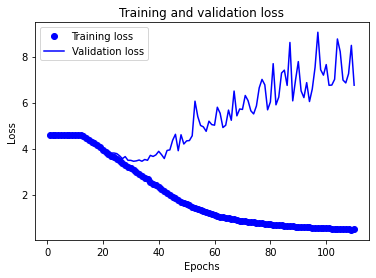

In [38]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
##Idea Ref: https://machinelearningmastery.com
##Paper Ref: Smayonan and Zisserman: Very Deep Convolutional Networks for Large Scale Image Recoginition